# Binary Classification

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Device Agnostic Code

In [234]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

### Data PreProcessing

In [235]:
data = pd.read_csv('./dataset-classification/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [236]:
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'Y':0, 'N': 1})
data['ST_Slope'] = data['ST_Slope'].replace({'Up': 1,'Flat': 0,'Down': -1})
data['Sex'] = data['Sex'].replace({'M':1, 'F':0})
data['RestingECG'] = data['RestingECG'].replace({'Normal':1,'LVH':2,'ST':3})
data['ChestPainType'] = data['ChestPainType'].replace({'ASY':1, 'NAP':2, 'ATA':3, 'TA':4})

data.describe()

/tmp/ipykernel_72244/629159925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ExerciseAngina'] = data['ExerciseAngina'].replace({'Y':0, 'N': 1})
/tmp/ipykernel_72244/629159925.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ST_Slope'] = data['ST_Slope'].replace({'Up': 1,'Flat': 0,'Down': -1})
/tmp/ipykernel_72244/629159925.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.748366,132.396514,198.799564,0.233115,1.592593,136.809368,0.595861,0.887364,0.361656,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-2.600000,-1.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,6.200000,1.000000,1.000000


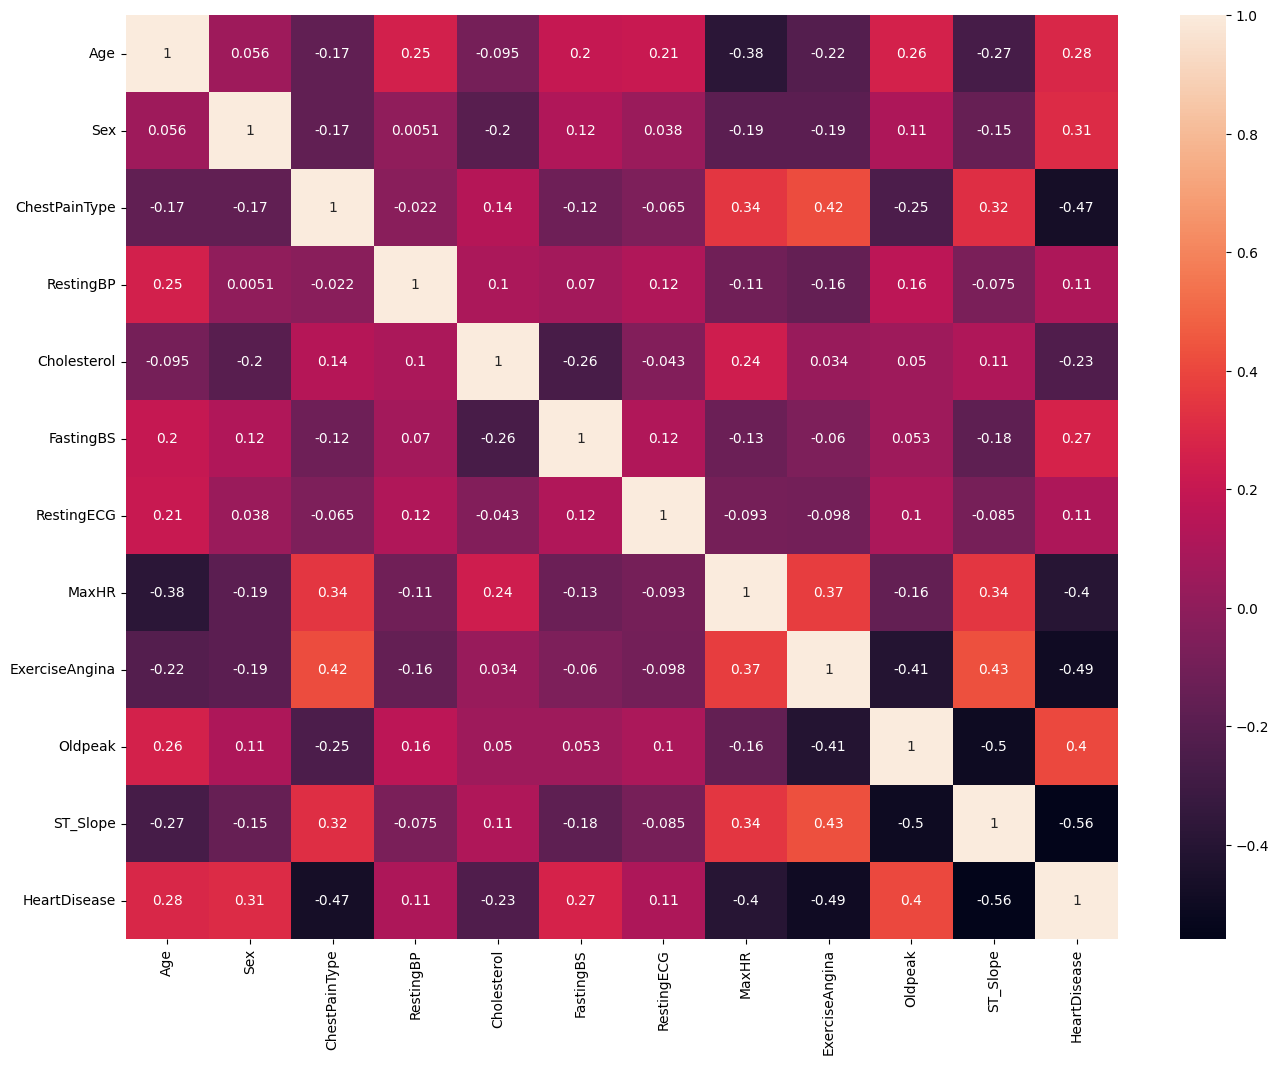

In [237]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [238]:
X = data.drop(columns=['HeartDisease', 'RestingBP', 'Cholesterol', 'RestingECG'])
y = data['HeartDisease']

X.head()

,Age,Sex,ChestPainType,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,3,0,172,1,0.0,1
1,49,0,2,0,156,1,1.0,0
2,37,1,3,0,98,1,0.0,1
3,48,0,1,0,108,0,1.5,0
4,54,1,2,0,122,1,0.0,1


In [239]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### Split the data

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

### Convert Dataframes to Tensors

In [241]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [242]:
X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train_np, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test_np, dtype=torch.float32).to(device)

In [243]:
X_train.shape, y_train.shape, X_train.dim(), y_train.dim()

(torch.Size([688, 8]), torch.Size([688]), 2, 1)

### Creating Model

In [244]:
class myModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=8, out_features=18)
        self.layer2 = nn.Linear(in_features=18, out_features=24)
        self.layer3 = nn.Linear(in_features=24, out_features=24)
        self.layer4 = nn.Linear(in_features=24, out_features=10)
        self.layer5 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))))

In [245]:
model = myModel().to(device)

model

myModel(
  (layer1): Linear(in_features=8, out_features=18, bias=True)
  (layer2): Linear(in_features=18, out_features=24, bias=True)
  (layer3): Linear(in_features=24, out_features=24, bias=True)
  (layer4): Linear(in_features=24, out_features=10, bias=True)
  (layer5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Calculate Accuracy Function

In [246]:
def accuracy_fn(y_pred, y_actual):
    assert y_pred.shape == y_actual.shape
    correct = torch.eq(y_pred, y_actual).sum().item()
    accuracy = (correct / len(y_actual)) 
    return accuracy

### Setup Loss Function and Optimizer

In [247]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Plotting Function

In [248]:
def plot_fn(x, y, label, title):
    plt.subplots(1, 2, figsize=(12, 5))
    plt.plot(x, y, label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(label)
    plt.legend()
    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

In [249]:
def plot_side_by_side(epochs, loss, accuracy, label_train_test):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot on the first subplot (left)
    ax[0].plot(epochs, loss, label='Loss', color='blue')
    ax[0].set_title(f'{label_train_test} Loss Over Epochs')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot on the second subplot (right)
    ax[1].plot(epochs, accuracy, label='Accuracy', color='red')
    ax[1].set_title(f'{label_train_test} Accuracy Over Epochs')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

### Training the model

In [250]:
X_train.size(), y_train.size(), X_test.size(), y_test.size()

(torch.Size([688, 8]),
 torch.Size([688]),
 torch.Size([230, 8]),
 torch.Size([230]))

In [251]:
train_loss, train_accu, test_loss, test_accu, epoch_arr = [], [], [], [], []

In [252]:
epochs = 50000

for epoch in range(epochs):

    model.train()

    # forward pass
    y_logits = model(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate loss and accuracy
    loss = loss_fn(y_logits.squeeze(), y_train)
    accu = accuracy_fn(y_pred.squeeze(), y_train)

    # optimizer
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # step the optimizer
    optimizer.step()

    # calulcating loss and accuracy for test data
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))

        loss_te = loss_fn(test_logits.squeeze(), y_test)
        accu_te = accuracy_fn(test_pred.squeeze(), y_test)
    
    if epoch % 500 == 0:
        print(f'Epoch: {epoch} | Train Loss: {loss:.2f} | Train Accuracy: {accu:.2f} |Test Loss: {loss_te:.2f} | Test Accuracy: {accu_te:.2f}')
        train_loss.append(loss)
        train_accu.append(accu)
        test_loss.append(loss_te)
        test_accu.append(accu_te)
        epoch_arr.append(epoch)

Epoch: 0 | Train Loss: 0.69 | Train Accuracy: 0.54 |Test Loss: 0.68 | Test Accuracy: 0.59
Epoch: 500 | Train Loss: 0.68 | Train Accuracy: 0.63 |Test Loss: 0.67 | Test Accuracy: 0.70
Epoch: 1000 | Train Loss: 0.67 | Train Accuracy: 0.64 |Test Loss: 0.66 | Test Accuracy: 0.70
Epoch: 1500 | Train Loss: 0.65 | Train Accuracy: 0.66 |Test Loss: 0.64 | Test Accuracy: 0.70
Epoch: 2000 | Train Loss: 0.63 | Train Accuracy: 0.68 |Test Loss: 0.62 | Test Accuracy: 0.72
Epoch: 2500 | Train Loss: 0.61 | Train Accuracy: 0.68 |Test Loss: 0.60 | Test Accuracy: 0.70
Epoch: 3000 | Train Loss: 0.60 | Train Accuracy: 0.68 |Test Loss: 0.59 | Test Accuracy: 0.70
Epoch: 3500 | Train Loss: 0.60 | Train Accuracy: 0.69 |Test Loss: 0.59 | Test Accuracy: 0.70
Epoch: 4000 | Train Loss: 0.60 | Train Accuracy: 0.69 |Test Loss: 0.59 | Test Accuracy: 0.70
Epoch: 4500 | Train Loss: 0.60 | Train Accuracy: 0.69 |Test Loss: 0.59 | Test Accuracy: 0.70
Epoch: 5000 | Train Loss: 0.60 | Train Accuracy: 0.70 |Test Loss: 0.59 | T

In [253]:
train_loss = [ loss.item() for loss in train_loss] 
test_loss = [ loss.item() for loss in test_loss ]

In [254]:
# plot_loss_accuracy(epoch_arr, train_loss, epoch_arr, train_accu, 'Training Loss', 'Training Accuracy', 'LOss and Accuracy of Training Data')
# plot_loss_accuracy(epoch_arr, test_loss, epoch_arr, test_accu, 'Testing Loss', 'Testing Accuracy', 'LOss and Accuracy of Testing Data')

#### Plotting Loss and Accuracy over epochs for Training Data

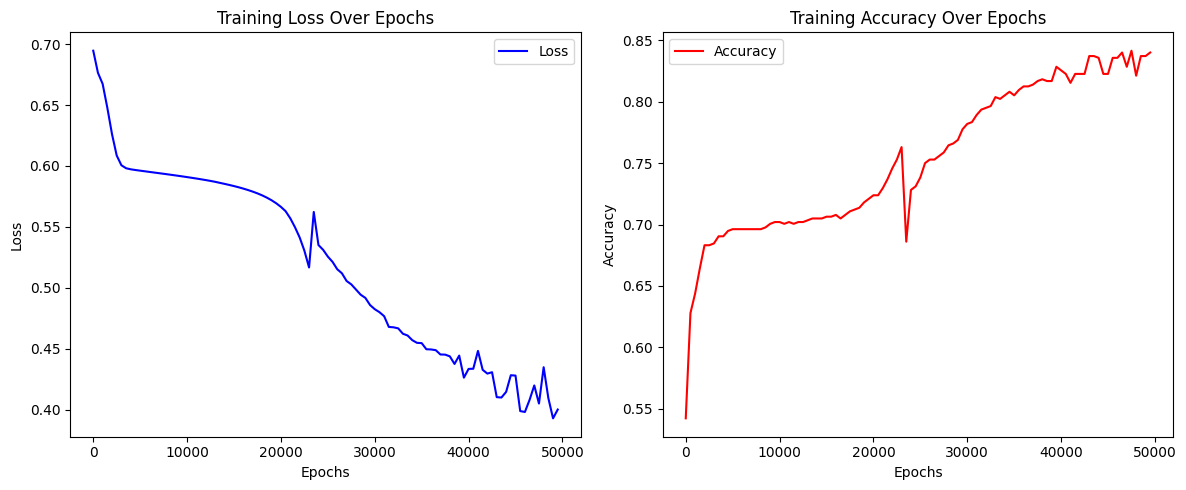

In [255]:
plot_side_by_side(epoch_arr, train_loss, train_accu, "Training")

#### Plotting Loss and Accuracy over epochs for Test Data

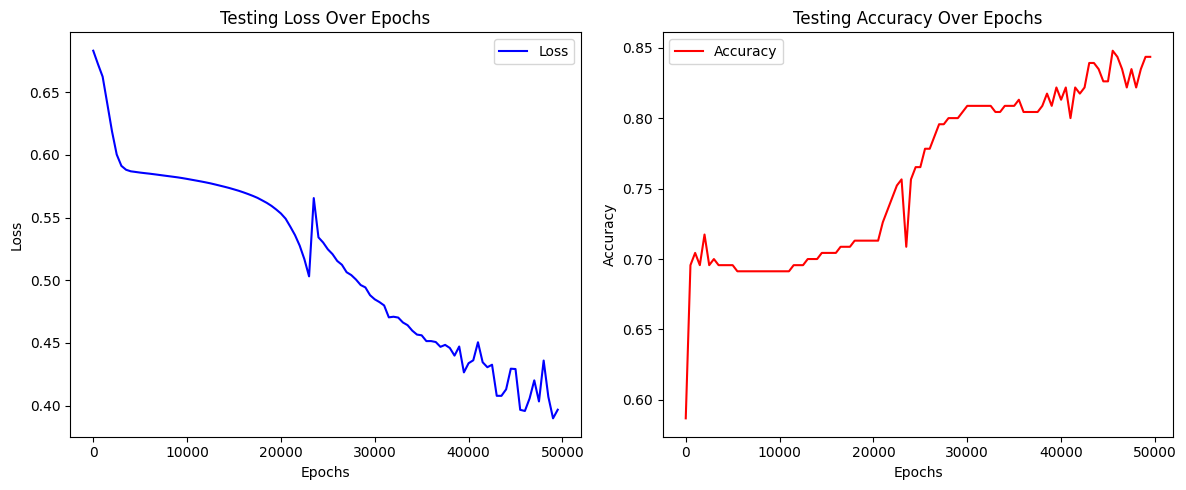

In [256]:
plot_side_by_side(epoch_arr, test_loss, test_accu, "Testing")

### Testing the model

In [257]:
model.eval()
with torch.inference_mode():
    test_output = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_output))

test_pred[:10], y_test[:10] 

(tensor([0., 1., 0., 1., 1., 1., 0., 1., 1., 1.]),
 tensor([0., 1., 0., 0., 1., 1., 0., 1., 0., 1.]))

### Calculating Metrics

In [258]:
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}')
print(f'Recall: {recall*100:.2f}')
print(f'F1 Score: {f1*100:.2f}')

Accuracy: 82.17%
Precision: 79.38
Recall: 94.07
F1 Score: 86.10


### Plotting Actual vs Predicted values

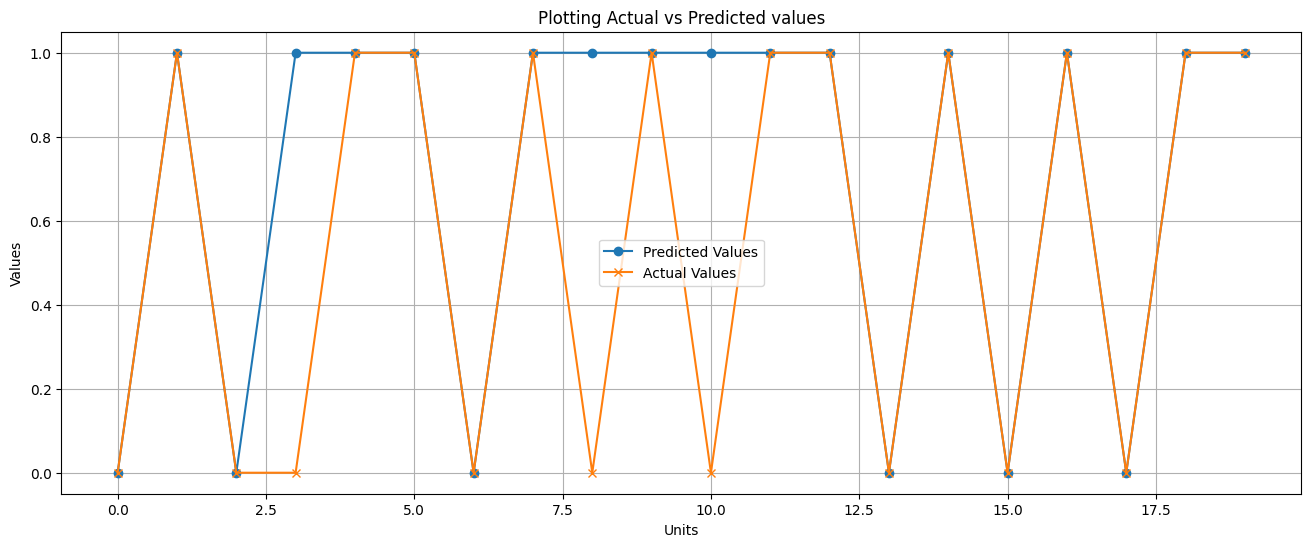

In [259]:
plt.figure(figsize=(16,6))
plt.plot(test_pred[:20], label='Predicted Values', marker='o')
plt.plot(y_test[:20], label='Actual Values', marker='x')
plt.title('Plotting Actual vs Predicted values')
plt.xlabel("Units")
plt.ylabel("Values")
plt.grid()
plt.legend()
plt.show()

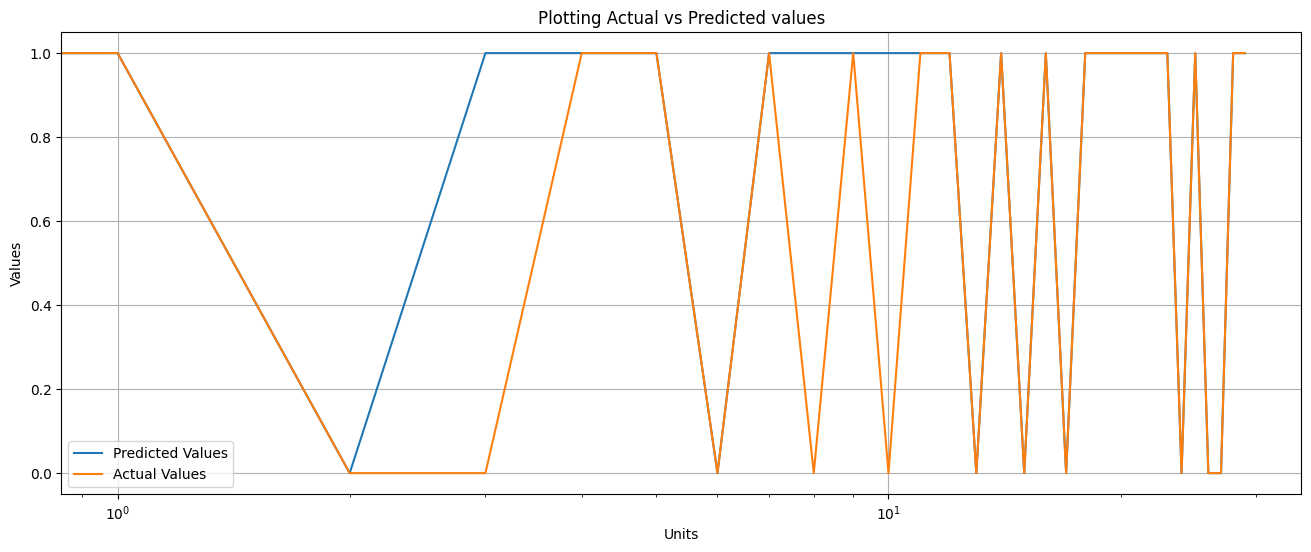

In [260]:
# scaled plot
plt.figure(figsize=(16,6))
plt.plot(test_pred[:30], label='Predicted Values')
plt.plot(y_test[:30], label='Actual Values')
plt.title('Plotting Actual vs Predicted values')
plt.xlabel("Units")
plt.ylabel("Values")
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()